# Data loading

In [1]:
%matplotlib inline # to present any diagrams inline with the rest of the notebook as opposed to in new browser window
import pandas as pd

path_to_csv = "data/abalone.csv"

### Specifying data indices
In order to easily identify data, which in the dataset provided doesn't have headers specified, we need to name our columns. 
At the same time we can add indices to the columns to speed up computations and enable random access to data.

In [2]:
df = pd.read_csv(path_to_csv, names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weigth','viscera_weight', 'shell_weight','rings'], header=None)

We need to verify that the data was imported successfully. The easiest avenue is to check the head and tail of the dataset

In [3]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weigth,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,sex,length,diameter,height,whole_weight,shucked_weigth,viscera_weight,shell_weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


# Data cleaning
## Checking for empty records
The very first thing that needs to be performed on any dataset, before any analysis can be perfoermed is cleaning the data. The rationale behind it is that missing records can and will skew any computations done on the dataset. We can use `isnull` method inherent to any `Data Frame`.

In [6]:
invalid = df[df.isnull().any(axis=1)]
print(invalid)

      sex  length  diameter  height  whole_weight  shucked_weigth  \
878     F   0.635     0.485   0.165        1.2945          0.6680   
1888    F   0.565     0.445   0.125        0.8305          0.3135   
3093  NaN   0.520     0.430   0.150        0.7280          0.3020   

      viscera_weight  shell_weight rings  
878              NaN        0.2715     9  
1888          0.1785        0.2300   NaN  
3093          0.1575        0.2350    11  


From the data above we can see that some records are missing data:
 - Row 878 is missing `viscera weight` property
 - Row 1888 is missing `rings` value
 - Row 3093 doesn't have value for `sex` specified

## Checking dataset for errorenous data
Before re remove any data we shoul analyze if there are any errors in the dataset. It should e done before removal of any data as if the number or errors in data is significant in may become necessary to substitute wrong data and at the same time it may be possible to fill the data gaps as well.
### Line diagram
One of the easiest ways to check dataset for errors is visual verification with a simple line diagram.

In [36]:
stuff
for cols in df.columns.tolist()[1:]:
     stuff= df.loc[data[cols] > 0]
        
stuff

NameError: name 'stuff' is not defined

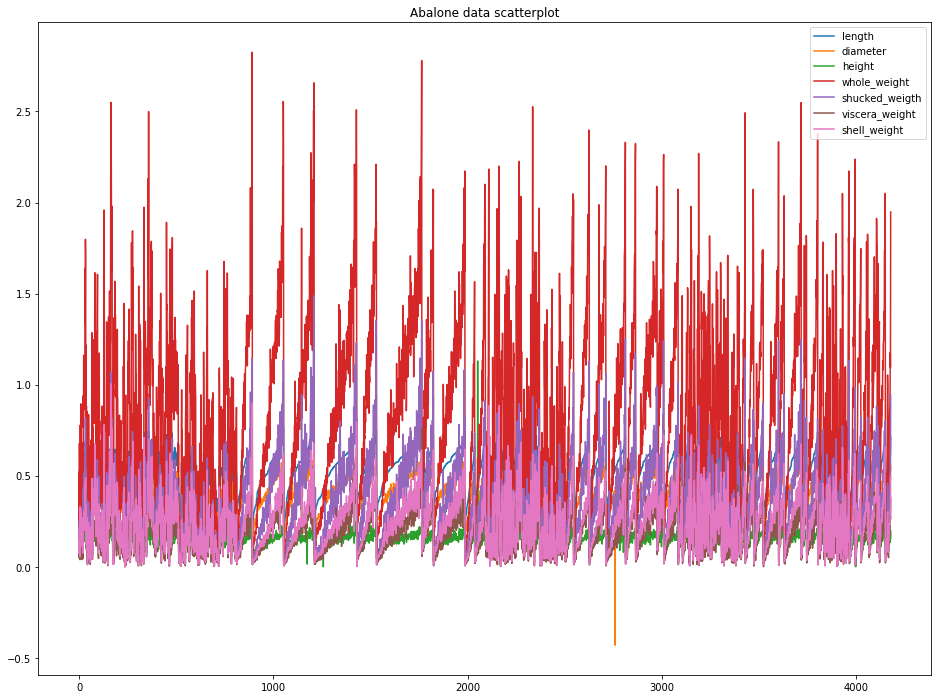

In [15]:
df.plot(figsize=(16,12), title='Abalone data scatterplot')

However, the diagram is quite messy, albeit it does help identify approximate location of a sub zero value for diameter - logically no abalone should have a negative diamater size. Let's keep a note of that for later analysis and try to identify errors in data in  acleaner manner.
### Scatter matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED526D8>,
      dtype=object)

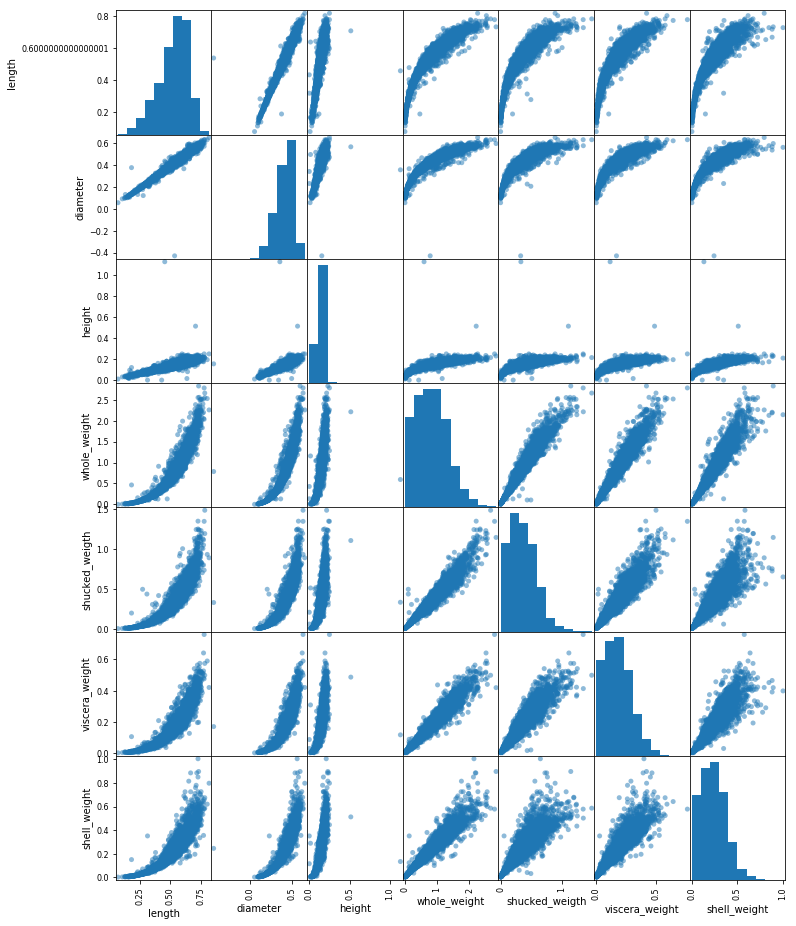

In [19]:
df.corr()
pd.plotting.scatter_matrix(df, figsize=(12,16), s=100)

In [ ]:
From checking the tail of the dataset in previous section we know that the dataset contains 4176 rows. As such 3 rows with missing data comprises less than 0.072% of the dataset and removing such a small amount or errorenous data should not affect our analysis significantly. 
Had the number been more significant the missing data would have had to been substituted.

In [7]:
df.describe()

,length,diameter,height,whole_weight,shucked_weigth,viscera_weight,shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4176.000000,4177.000000
mean,0.523992,0.407675,0.139516,0.828742,0.359367,0.180574,0.238831
std,0.120093,0.100082,0.041827,0.490389,0.221963,0.109620,0.139203
min,0.075000,-0.430000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093375,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.170750,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.252625,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000
